In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_fscore_support


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [4]:
pip install catboost

In [5]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
#import catboost as cb

In [6]:
!pip install --upgrade pip setuptools wheel


In [7]:
!pip uninstall -y numpy catboost
!pip install numpy catboost


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: catboost 1.2.7
Uninstalling catboost-1.2.7:
  Successfully uninstalled catboost-1.2.7
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached catboost-1.2.7-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached catboost-1.2.7-cp311-cp311-manylinux2014_x86_64.whl (98.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)


In [8]:
import numpy
import catboost
print("NumPy version:", numpy.__version__)
print("CatBoost version:", catboost.__version__)


NumPy version: 1.26.4
CatBoost version: 1.2.7


In [9]:
import catboost as cb

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/sample-submission.csv')


In [13]:
print("Initial Data Shape:", df.shape)

Initial Data Shape: (50, 2)


In [14]:
print(df.head())

       ID  target
0  409856       0
1  409857       0
2  409858       0
3  409859       0
4  409860       0


In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      50 non-null     int64
 1   target  50 non-null     int64
dtypes: int64(2)
memory usage: 932.0 bytes
None


In [16]:
print(df.describe())

                 ID     target
count      50.00000  50.000000
mean   409880.50000   0.020000
std        14.57738   0.141421
min    409856.00000   0.000000
25%    409868.25000   0.000000
50%    409880.50000   0.000000
75%    409892.75000   0.000000
max    409905.00000   1.000000


In [17]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 ID        0
target    0
dtype: int64


In [18]:
df.fillna(df.median(), inplace=True)


In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns  # Also make sure seaborn is imported


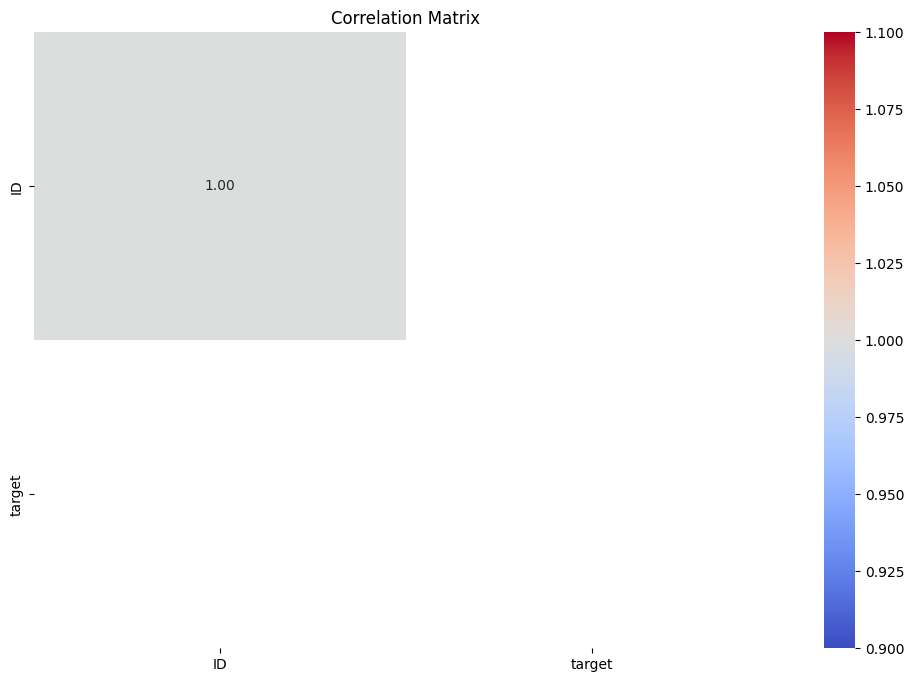

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [22]:
print(df.columns)


Index(['ID', 'target'], dtype='object')


In [23]:
X = df.drop('target', axis=1)  # Replace 'target' with your correct column name
y = df['target']

In [24]:
df.columns = df.columns.str.strip()  # Removes leading/trailing spaces
print(df.columns)


Index(['ID', 'target'], dtype='object')


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(39, 1) (10, 1) (39,) (10,)


In [26]:
from sklearn.preprocessing import StandardScaler


In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb



In [29]:
!pip install catboost


In [30]:
!pip install --upgrade numpy catboost


  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)


In [31]:
!pip install numpy==1.26.4


In [33]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": lgb.LGBMClassifier(),
    "CatBoost": cb.CatBoostClassifier(verbose=0)
}

In [34]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": lgb.LGBMClassifier(),
    "CatBoost": cb.CatBoostClassifier(verbose=0)
}

In [35]:
results = {}

In [37]:
print(y_train.value_counts())


target
0    39
Name: count, dtype: int64


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [45]:
from imblearn.over_sampling import SMOTE

